# Project Report
by Samra Kasim

## Evaluation of the Linear Regression Algorithm Utilizing Ordinary Least Squares Method

### Introduction

The Linear Regression algorithm is used for predictive analysis and it demonstrates the relationship (if it exists) between two variables using a linear equation (i.e., a straight line). [1] One variable is known as the dependent variable and the other as the independent variable. The algorithm utilizes the ordinary least squares method to create the line of best fit. The least square methods minimizes the sum of square errors. [2] Root Mean Square Error ($RMSE$) Root Mean Squared ($R^2$) calculations are used alongside Linear Regression to determine the accuracy of the model. The purpose of linear regression is to examine if a variable is a significant predictor of an outcome variable. Linear regression is often used in determining predictor strength, effect forecasting, and trend forecasting. [3]

### The Algorithm

The linear regression algorithm utlizes `numpy` arrays as the data structure to store and process data. The linear regression line has the equation in the form of

$$ Y = \beta_0 + \beta_1X $$ 

where $X$ is the independent variable and $Y$ is the dependent variable. $\beta1$ is the slope of the line and is also called the coefficient while $\beta0$ is the $y$ intercept and is also called the bias coefficient.

The algorithm utilizes the Ordinary Least Squares method for linear regression, which entails calculating the line of best fit by minimizing the sum of squares for each point. [5] The calculation of the sum of square errors for all points $n$ can be represented as the equation and the error is squared to account for negative error values 

$$ D = \sum \limits_{i=1}^{n} d_i^2 $$

The errors above as represented by $D$ can be minimzed by the following equation to calculate the slope $\beta_1$ and y intercept $\beta_0$

$$ \beta_1 = \frac {\sum \limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sum \limits_{i=1}^{n} (x_i - \bar{x})}$$

$$ \beta_0 = \bar{y} - \beta_1{x}$$

Therefore, the algorithm is as follows:
1. Calculate the mean of all $x$ values in the dataset.
2. Calculate the mean of all $y$ values in the dataset.
3. For every pair of $x$ and $y$ values, calculate the difference of every $x_i$ value from the mean. Then multiply that by the difference of every $y_i$ value and its difference from $\bar{y}$ to calculate the numerator of the slope. Additionally, calculate a denominator by  taking the difference of every $x_i$ value from the mean and squaring to calcuate the denominator of the slope.  
4. Calculate the $\beta_1$ value by dividing the numerator and denominator for the previous step
5. Calculate the $\beta_0$ value by subtracting the multiplication of the slope from the previous step with $\bar{x}$ and subtracting that value $\bar{y}$

The straight line $y = \beta_0 + \beta_1X$ generated from the above algorithm is the line of best for the given data points.

To calculate the accuracy of the model, this project utilizes $RMSE$ and $R^2$. $RMSE$ as represented by the following equation and measures the residual, which is the difference between the predicted $\hat{y_i}$ and actual $y_i$ values of a model. [6] The smaller the $RMSE$ value the closer the model is a git to the data. [8]

$$RMSE = \sqrt{ \sum \limits_{i=1}^{n} \frac{1}{m} (\hat{y_i} - y_i)^2}$$

The $R^2$ error measure denotes the proportion of variance of a dependent variable that can be explained by the indepenent variable. The $SS_t$ value represents the unexplained variation and the $SS_r$ value represents total variation. The closer the $R^2$ is to $1$ the better fit the predicted model is to the data. [7]

 $$ SS_t = \sum \limits_{i=1}^{n} (y_i - \bar{y})^2 $$
 $$ SS_r = \sum \limits_{i=1}^{n} (y_i - \hat{y})^2 $$
 $$ R^2 = 1 - \frac{SS_r}{SS_t}$$

### Practical Applications

Linear Regression has multiple practical applications, including:
* **_Medical Data:_** Linear regression is used to calculate and forecast risk scores for individuals based on particular characteristics. For example, a dependent variable such as blood pressure can be explained by independent variables such as age and weight.[11] In another example, linear regression has been utilized to define the relationship between the distribution of wealth in a country and associated health outcomes.[10]
* **_Voting:_** In Pierce County, WA, linear regression was used to determine the relationship between turnout and the percent of Hispanic adults in the population.[12] More recently, linear regression models were cited to show the relationship between education attainment and civic duty, which showed that higher rates of education (such as a college degree) result in higher rates of voting. [13]
* **_Finance:_** Finance is another area where linear regression is commonly used. For example, linear regression models can be used to dtermine the impact of specific factors on the stock market closing price.[14]


### The Algorithm Script

In [213]:
import numpy as np

In [214]:
def ordinary_least_squares(X, y, N):
    # calculate mean of all X values
    mean_x = np.mean(X)                                # O(n)
    # calculate mean of all y values
    mean_y = np.mean(y)                                # O(n)
    numerator = 0                                      # O(1)
    denominator = 0                                    # O(1)
    # for each (x,y) par in the dataset
    # minimize the errors
    for i in range(N):                                 # O(n)
        numerator += (X[i] - mean_x) * (y[i] - mean_y) # O(1)
        denominator += (X[i] - mean_x) ** 2            # O(1)

    # calculate the slope of the line
    b1 = numerator/denominator                         # O(1)
    # calculate the y intercept of the line
    b0 = mean_y - (b1 * mean_x)                        # O(1)
    
    return b1, b0                                      # O(1)


### Error Calculation

In [215]:
# calculate every predicted y values given a b0, b1
def calculate_y_pred(X, b0, b1, N):
    y_pred = b0 + b1*X  # O(n) because uses numpy array multiplication
    return y_pred       # O(1)

In [216]:
# calculate the RMSE
def calculate_rmse(X, y, y_pred, N):
    rmse = 0                                          # O(1)
    # for every (x,y) pair
    for i in range(N):                                # O(n)
        y_actual = y[i]                               # O(1)
        # sum the residual of by taking the 
        # squared difference of actual y value
        # from the predicted by value
        rmse += (y_pred[i] - y_actual) ** 2           # O(1)
    # calcualte the average rmse
    rmse = rmse/N                                     # O(1)
    # square root the average rmse
    return np.sqrt(rmse)                              # O(1)

In [217]:
# calculate r^2
def calculate_r_squared(X, y, b0, b1, y_pred, mean_y, N):
    ssr = 0                                           # O(1)
    sst = 0                                           # O(1)
    # for every (x,y) pair
    for i in range(N):                                # O(n)
        # calculate total variance
        ssr += (y[i] - y_pred[i]) ** 2                # O(1)                
        # calculate unexplained variance
        sst += (y[i] - mean_y) ** 2                   # O(1)
    # subtract from 1 to provide a ratio
    # representing r^2
    r_squared = 1 - (ssr/sst)                         # O(1)
    return r_squared                                  # O(1)

### Canonical Test Data Generation

The following methods faciliate generation of data of various sizes and writing and reading data to pickle files. The data utilizes a linear equation with parameterized $\beta_0$, $\beta_1$, and noise values that can be manipulated to enhance the variability of the datasets. In addition, gaussian randomization with parameterized $\mu$ and $\sigma$ values are also added to the linear equation to add variability.

In [218]:
import pickle as pk
from random import randint
import random
from IPython.display import display, Markdown, Latex

In [219]:
# linear function to generate y values from given X values
# param X represents a list of x values
# param noise represents the level of noise to add to the linear equation
def linear_function(X, noise, b1, b0, mu, sigma):
    # to provide variability in the generated random set
    # gaussian randomization is added to the linear equation
    # noise is added to give added variability
    gaussian_randomization = np.random.normal(mu, sigma, len(X))    
    y = (b1*X) + b0 + (gaussian_randomization*noise)
    return y # list of y values

In [220]:
# generate X and y values and a data dict {X:y} for storage
def generate_data_values(array_size, noise, stop, b1, b0, mu, sigma):
    # generate x values based on the array_size provided
    x_list = np.linspace(1.0, stop, num=array_size, endpoint=False, dtype=float)
    # convert x values to an numpy array
    X = np.array(x_list)
    y = linear_function(X, noise, b1, b0, mu, sigma)
    data = dict(zip(X, y)) # create a dictionary {X:Y} for pickle storage
    return data

In [221]:
# pickling data 
def generate_canonical_test_files(files_created, array_size, noise=.5, stop=100.0, b1=2, b0=2, mu=0, sigma=2, noise_type='low_'):
    # given a list of array size for each of the array size
    # generate a file and save it to disk
    for i in range(len(array_size)):
        filename = 'data_'+ noise_type + str(array_size[i])
        print(filename)
        files_created.append(filename)
        outfile = open(filename, 'wb')
        # generate values
        data = generate_data_values(array_size[i], noise, stop, b1, b0, mu, sigma)
        # write values to a file
        pk.dump(data, outfile)
        outfile.close()
    return files_created

In [222]:
# unpickling data
def read_data_file(filename):
    # read a given file on disk and load it into memory
    infile = open(filename, 'rb')
    data = pk.load(infile)
    infile.close()
    return data # returns a dictionary in the form {X:y}

In [223]:
# parse loaded Pickle dictionary into X, Y lists
def parse_data_dict(adict):
    X, y = zip(*adict.items())
    return np.array(X), np.array(y) # return numpy arrays
        

#### Algorithm Validation


In [224]:
def validate_algorithm():
    x_list = np.linspace(1.0, stop=100, num=10, endpoint=False, dtype=float)
    X = np.array(x_list)
    y = linear_function(X, noise=0, b1=3.2, b0=1.7, mu=0, sigma=2)
    N = 10
    b1, b0 = ordinary_least_squares(X, y, N)
    y_pred = calculate_y_pred(X, b0, b1, N)
    rmse = calculate_rmse(X, y, y_pred, N)
    r2 = calculate_r_squared(X, y, b0, b1, y_pred, np.mean(y), N)
    display(Markdown('**Validating algorithm...**' ))
    if round(b1,3) == 3.2 and round(b0,3) == 1.7:
        print('ordinary least squares algorithm is correct')
    if y_pred.all() == y.all():
        print('predicted y values are correct')
    if round(r2,3) == 1.0 and round(rmse, 3) == 0.0:
        print('r^2 and rmse values are correct')

validate_algorithm()


**Validating algorithm...**

ordinary least squares algorithm is correct
predicted y values are correct
r^2 and rmse values are correct


### Algorithm Demonstration

#### Overview

With the spread of the extremely contagious COVID-19 virus around the global, this project presented a timely opportunity to utilize the COVID-19 global timeseries data made available by the Center for Systems Science and Engineering at Johns Hopkins University.[9]

If allowed to proliferate unabated, the COVID-19 infection rate follows an exponential growth rate as seen in the two graphs below. For the purposes of algorithm demonstration we will focus on India and South Dakota, USA. As demonstrated by the two graphs below, the illustrate the number of cases per day since day 0 (i.e., the day the first case was detected) to November 10, 2020. Due to global lockdown in the initial phase of the pandemic, these two regions managed to suppress the infection rates. However, in both regions, once the lockdown, not much effort was made to put in place infection mitigation efforts. As a result, the rates of infect post-lockdown followed a linear growth rate.

For the purposes of this demonstration, since India lifted its COVID-19 lockdown in June, 2020, the data utlized is from Day 180 onwards. While for South Dakota, the data utilized is for the last 60 days when South Dakota has one of the highest rates of infection in the USA.

In the analysis, the COVID data is divided into a test and training dataset based on a 80/20 split. The dependent variable is the number of people infected and the independent variable is the day since the intitial infection was detected in the region. The test data is then utilized to determine the $R^2$ value of the model and determine how well the model did in predicting outcomes.

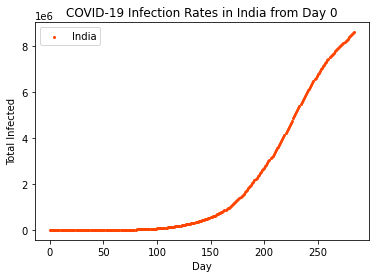

In [225]:
all_india = pd.read_csv('india_covid_timeseries.csv')
# plotting points
plt.scatter(all_india['day'], all_india['total_infected'], label='India', color='orangered', s=4)
# add x-label
plt.xlabel('Day')
# add y-label
plt.ylabel('Total Infected')
# plot title
plt.title('COVID-19 Infection Rates in India from Day 0')
# show legend
plt.legend()
#show graph

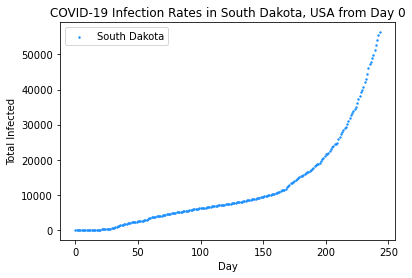

In [226]:
all_sd = pd.read_csv('sd_covid_timeseries.csv')
# plotting points
plt.scatter(all_sd['day'], all_sd['total_infected'], label='South Dakota', color='dodgerblue', s=2)
# add x-label
plt.xlabel('Day')
# add y-label
plt.ylabel('Total Infected')
# plot title
plt.title('COVID-19 Infection Rates in South Dakota, USA from Day 0')
# show legend
plt.legend()
#show graph
plt.show()

In [227]:
def algorithm_demo_with_covid_data(df):
    X = np.asarray(df['day'])
    y = np.asarray(df['total_infected'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    N_train = len(X_train)
    N_test = len(X_test)
    # run algorithm and measure run time
    start_run = timer()
    b1, b0 = ordinary_least_squares(X_train, y_train, N_train)
    end_run = timer()
    run_time = end_run - start_run
    display(Markdown('Run time: %s' % run_time))
    # calculate error
    display(Markdown('**Analysis** '))
    display(Markdown('$y=%s+%sX$' %(b0,b1)))
    y_pred_train = calculate_y_pred(X_train, b0, b1, N_train)
    y_pred_test = calculate_y_pred(X_test, b0, b1, N_test)
    rmse = calculate_rmse(X_test, y_test, y_pred_test, N_test)
    display(Markdown('$RMSE$: %s' % rmse))
    r2 = calculate_r_squared(X_test, y_test, b0, b1, y_pred_test, np.mean(y_test), N_test)
    display(Markdown('$R^2$: %s' % r2))
    return X_train, y_train, X_test, y_test, y_pred_train

In [228]:
def draw_demo_covid_graph(plt, X_train, y_train, X_test, y_test, y_pred_train, title):
    # plotting points
    plt.scatter(X_train, y_train, label='training data', color='dodgerblue', s=2)
    plt.scatter(X_test, y_test, label='test data', color='orangered', s=4)
    # plotting predicted line
    plt.plot(X_train, y_pred_train, color='darkslategrey', label='predicted')
    # add x-label
    plt.xlabel('Day')
    # add y-label
    plt.ylabel('Total Infected')
    # plot title
    plt.title(title)
    # show legend
    plt.legend()
    #show graph
    plt.show()

#### Analysis of COVID-19 Data

The post-lockdown data was utilized in the linear regression analysis using the Ordinary Least Squares algorithm above. The analysis is below, but the key result is $R^2$ value which demonstrates that our model had a high rate (99.4%) rate of correctly predicting variables from the test dataset after being trained on a different dataset. The graph below demonstrates that the predicted linear regression line tracks closely to the values in the dataset.

Alternatively, it is also not surprising that the $R^2$ value for South Dakota was lower at 95.6% since through visual analysis of the graph it can be seen that dataset values do not track as closely to the predicted linear regression line.

However, both runs of the model do successfully demonstrate that there is a linear relationship between the number of days since day 0 and the total number of people infected in these states. Although, visually it appears that the curve is flatting in India based on the most recent data while the curve in South Dakota is taking a more exponential growth shape, which is alarming news for South Dakota.

In [229]:
cdf = pd.read_csv('india_covid_timeseries.csv')
post_opening = cdf.iloc[180:]
X_train_in, y_train_in, X_test_in, y_test_in, y_pred_train_in = algorithm_demo_with_covid_data(post_opening)

Run time: 0.0007576719945063815

**Analysis** 

$y=-11994991.609318536+74120.09589205543X$

$RMSE$: 190158.63182278784

$R^2$: 0.9938102898578083

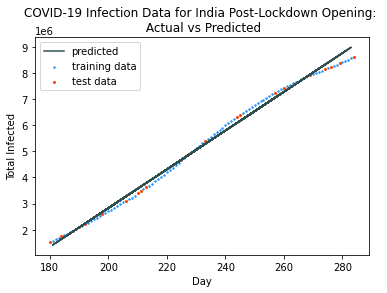

In [230]:
draw_demo_covid_graph(plt,X_train_in, y_train_in, X_test_in, y_test_in, y_pred_train_in, 'COVID-19 Infection Data for India Post-Lockdown Opening: \n Actual vs Predicted')

In [231]:
sd_df = pd.read_csv('sd_covid_timeseries.csv').iloc[-60:]
X_train_nd, y_train_nd, X_test_nd, y_test_nd, y_pred_train_nd = algorithm_demo_with_covid_data(sd_df)

Run time: 0.0005570970024564303

**Analysis** 

$y=-110759.76141570318+662.4130694848332X$

$RMSE$: 2682.1488755130717

$R^2$: 0.9560958135850199

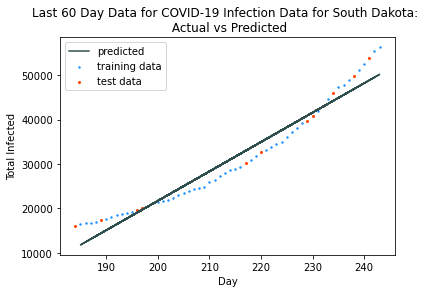

In [232]:
draw_demo_covid_graph(plt, X_train_nd, y_train_nd, X_test_nd, y_test_nd, y_pred_train_nd, 'Last 60 Day Data for COVID-19 Infection Data for South Dakota: \n Actual vs Predicted')

### Theoretical Analysis

The following provides the time and space complexity of the ordinary least squares algorithm. Refer to the above cells for details on algorithm complexity  

**Worst case:**  There are $N$ elements in each $X$ and $y$ arrays. The algorithm runs three loops N times:   
  1) calculate the mean of all X values   
  2) calculate the mean of all y values   
  3) main loop. Together, they combine to produce a worst case complexity of $\mathcal{O}(n+n+n)$, which utilizing asymptotic analysis is $\mathcal{O}(n)$.    
**Average case:** Since each of the three loops have to be run no matter the size or nature of the elements in the array, the average case complexity is also $\mathcal{O}(n)$.  
**Space complexity:** The $X$, $y$ arrays each have a space complexity of $\mathcal{O}(n)$. The other variables $N$, `mean_x`, `mean_y`, `numerator`, `denominator`, `b1`, and `b0` all hold single values and have space complexity of $\mathcal{O}(1)$ each. Together the space complexity for the algorithm is $\mathcal{O}(n+n+7)$ and with asymptotic analysis it is $\mathcal{O}(n)$

### Empirical Analysis

In [233]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer

In [234]:
# generate low noise test files of the following sizes
files_created = []
array_size=[100,1000,10000,100000, 1000000, 10000000]
display(Markdown('**Generating low noise canonical files:**'))
generate_canonical_test_files(files_created, array_size, noise=2, stop=500, b1=3, b0=5, noise_type='low_')
# generate high noise test files of the following sizes
display(Markdown('**Generating high noise canonical files:**'))
generate_canonical_test_files(files_created, array_size, noise=15, stop=500, mu=0, sigma=3, noise_type='high_')

**Generating low noise canonical files:**

data_low_100
data_low_1000
data_low_10000
data_low_100000
data_low_1000000
data_low_10000000


**Generating high noise canonical files:**

data_high_100
data_high_1000
data_high_10000
data_high_100000
data_high_1000000
data_high_10000000


['data_low_100',
 'data_low_1000',
 'data_low_10000',
 'data_low_100000',
 'data_low_1000000',
 'data_low_10000000',
 'data_high_100',
 'data_high_1000',
 'data_high_10000',
 'data_high_100000',
 'data_high_1000000',
 'data_high_10000000']

In [238]:
# conduct empirical analysis on the data row by row
# return result as a dict, which represents each row in a pandas dataframe
def conduct_empirical_analysis(filename, noise_level, runs=2):
    row_dict = {}
    # read the following file and load data in memory
    data = read_data_file(filename)
    X, y = parse_data_dict(data)
    # split data into test train datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    N_train = len(X_train)
    N_test = len(X_test)
    row_dict['data_size'] = N_train
    row_dict['noise_level'] = noise_level
    # run algorithm and measure run time
    b1 = b0 = 0.0
    start_run = timer()
    for _ in range(0, runs):
        b1, b0 = ordinary_least_squares(X_train, y_train, N_train)
    end_run = timer()
    run_time = (end_run - start_run)/runs
    row_dict['run_time'] = run_time
    row_dict['b1'] = b1
    row_dict['b0'] = b0
    # calculate error
    y_pred_train = calculate_y_pred(X_train, b0, b1, N_train)
    y_pred_test = calculate_y_pred(X_test, b0, b1, N_test)
    rmse = calculate_rmse(X_test, y_test, y_pred_test, N_test)
    r2 = calculate_r_squared(X_test, y_test, b0, b1, y_pred_test, np.mean(y_test), N_test)
    row_dict['rmse'] = rmse
    row_dict['r_squared'] = r2
    
    return row_dict

In [239]:
# generate a list of rows that can then be converted to a pandas dataframe
def generate_rows(files_created):
    rows = []
    for f in files_created:
        if 'data_low' in f:
            noise_level = 'low'
            row_dict = conduct_empirical_analysis(f, noise_level, runs=2)
            rows.append(row_dict)
        else:
            noise_level = 'high'
            row_dict = conduct_empirical_analysis(f, noise_level, runs=2)
            rows.append(row_dict)
    return rows

In [240]:
# create pandas dataframe
rows = generate_rows(files_created)
df = pd.DataFrame(rows)

#### Plotting data

In [241]:
df1 = df.iloc[0:6]
df2 = df.iloc[6:12]

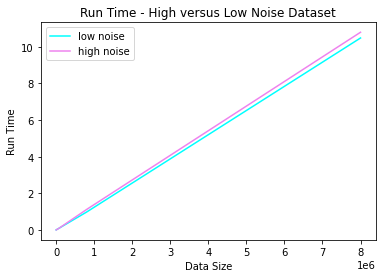

In [242]:
ax = df1.plot(x='data_size', y='run_time', kind='line', color='cyan', label='low noise')
df2.plot(ax=ax, x='data_size', y='run_time', kind='line', color='violet', label='high noise')
plt.xlabel('Data Size')
plt.ylabel('Run Time')
plt.title('Run Time - High versus Low Noise Dataset')
plt.legend()
plt.show()

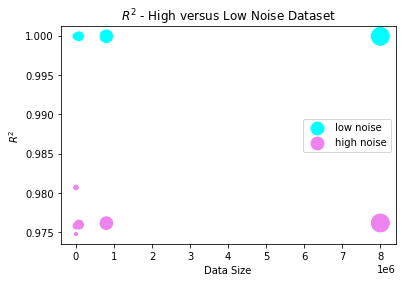

In [243]:
s1 = [10*2**n for n in range(len(df1['data_size']))]
s2 = [10*2**n for n in range(len(df2['data_size']))]
ax = df1.plot(x='data_size', y='r_squared', kind='scatter', color='cyan', label='low noise', s=s1)
df2.plot(ax=ax, x='data_size', y='r_squared', kind='scatter', color='violet', label='high noise', s=s2)
plt.xlabel('Data Size')
plt.ylabel('$R^2$')
plt.title('$R^2$ - High versus Low Noise Dataset')
plt.legend()
plt.show()

### Conclusions

**Run Time**  

As the Run Time plot above demonstrates, the run time of the algorithm increases as the size of data increases. The data size to run time relationship follows a linear relationship, which tracks with the theoretical complexity of the algorithm as $\mathcal{O}(n)$ since a `for` loop requires that the analysis be run on each $x$ and $y$ value in the dataset. For the purposes of this analysis, the algorithm was run multiple times and the run time was averaged across the runs to minimize error. During the testing phase, the run times for high noise dataset versus the low noise dataset tracked fairly closely, but if there was a difference, it was due to the high noise dataset having greater run times, especially in the larger dataset. Although, per the theoretical analysis, the level of noise should not impact the run time, in practical application, it is likely that the mathematical computations where $x$ and $y$ values were subtracted from the mean took slightly longer resulting in a slightly longer run time for the high noise dataset. 

**$R^2$ Values**

The second plot above demonstrates the $R^2$ values for the high and low noise datasets and as expected. The low noise datasets had very high $R^2$ values. The datasets were split into training and test datasets using an 80/20 split. The $\beta_0$ and $\beta_1$ values were then used in the training dataset to determine the $R^2$ value. Although, not very useful for the canonical datset, it does demonstrate that the effectiveness of the ordinary least squares algorithm. Below, we discuss the usefulness of training and test dataset for practical application.  


**Real World Data Analysis**  

For real world data analysis, to determine a relationship between an independent variable and a dependent variable, it is necessary to first determine if a linear relationship exists in the data. This can be accomplished using a scatter plot to initially visualize the data. If a dataset does not lend itself to a linear relationship then the ordinary least squares analysis will not be helpful. Additionally, $\beta_0$ and $\beta_1$ variables are gathered from running the algorithm, it is necessary to use a method such as $R^2$ to determine the degree of the relationship, which is made possible by splitting the dataq into train and test datasets. Therefore, the analysis we conducted demonstrates that by identify the mean of all $X$ and the mean of all $Y$ and then taking each individual $x$ and $y$ value and subtracting that from the mean is a sound way to identify a predictive relationship.


### Sources

[1] Linear Regression, www.stat.yale.edu/Courses/1997-98/101/linreg.htm.  
[2] Kenton, Will. “How the Least Squares Method Works.” Investopedia, Investopedia, 16 Sept. 2020, www.investopedia.com/terms/l/least-squares-method.asp#:~:text=The least squares method is a statistical procedure to find,the behavior of dependent variables.  
[3] “What Is Linear Regression?” Statistics Solutions, www.statisticssolutions.com/what-is-linear-regression/.  
[4] Raheem, Abdul Hafeez Abdul. “Linear Regression from Scratch.” Medium, Towards Data Science, 11 Nov. 2018, towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72.
[5] “Linear Regression from Scratch in Python.” Mubaris NK, mubaris.com/posts/linear-regression/.  
[6] RMS Error, statweb.stanford.edu/~susan/courses/s60/split/node60.html.
[7] Frost, Jim, et al. “How To Interpret R-Squared in Regression Analysis.” Statistics By Jim, 16 July 2020, statisticsbyjim.com/regression/interpret-r-squared-regression/.  
[8] “What Are Mean Squared Error and Root Mean Squared Error?” Technical Information Library, 30 Nov. -1, www.vernier.com/til/1014.  
[9] CSSEGISandData. “CSSEGISandData/COVID-19.” GitHub, github.com/CSSEGISandData/COVID-19.  
[10] Dieleman, J, and T Templin. “Estimating National Poverty Rates and Their Effect on Mortality: 129 Countries, 1990–2013.” The Lancet Global Health, vol. 3, Mar. 2015, p. S10, 10.1016/s2214-109x(15)70129-4.  
[11] Schneider, Astrid, et al. “Linear Regression Analysis: Part 14 of a Series on Evaluation of Scientific Publications.” Deutsches Arzteblatt International, Deutscher Arzte Verlag, Nov. 2010, www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/.  
[12] Klementiev, Alex, et al. "Voter Turnout in Pierce County, WA: Analysis of Electoral and Population Data." Tacoma-Pierce County Health Department. https://www.tpchd.org/home/showdocument?id=4337  
[13] Hansen, Eric R., et al. "Education Attainment and Social Norms of Voting." America Political Science Assocation. https://static1.squarespace.com/static/5b953c5f9d5abb8c51d6d8c6/t/5b957f1203ce64eefd1fba92/1536524051067/Hansen_Tyner_Norms_Voting.pdf  
[14] Seethalakshmi, R., "Analysis of stock market predictor variables using Linear Regression." School of Humanities and Sciences, SASTRA Deemed to be University, India.  
